# 1000 чертей

In [2]:
from scipy.interpolate import splrep, splev
import statsmodels
import pc
import statsmodels.api as sm
import statsmodels.stats.api as ssa
import scipy
import numpy as np
import random
import sklearn
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
import math
from scipy.stats import bws_test
from sklearn import linear_model 
import csv
from sklearn.linear_model import LinearRegression, HuberRegressor, RANSACRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.regression.quantile_regression import QuantReg
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, OPTICS, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
from scipy.linalg import eigh as sp_eigh
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC


# task 1

In [25]:




np.random.seed(0)
n_samples = 100

mean1 = [0, 0]
cov1 = np.eye(2)

mean2 = [1, 1]
cov2 = np.eye(2)

data1 = np.random.multivariate_normal(mean1, cov1, n_samples)
data2 = np.random.multivariate_normal(mean2, cov2, n_samples)

cov2_custom = np.diag([2, 1])

data1_custom = np.random.multivariate_normal(mean1, cov1, n_samples)
data2_custom = np.random.multivariate_normal(mean2, cov2_custom, n_samples)

X1 = np.vstack((data1, data2))
y1 = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

X2 = np.vstack((data1_custom, data2_custom))
y2 = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.5, random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.5, random_state=0)

# LDA model
lda1 = LinearDiscriminantAnalysis()
lda1.fit(X1_train, y1_train)
y1_pred_lda = lda1.predict(X1_test)

lda2 = LinearDiscriminantAnalysis()
lda2.fit(X2_train, y2_train)
y2_pred_lda = lda2.predict(X2_test)

# SVC model
svc1 = SVC(kernel='linear')
svc1.fit(X1_train, y1_train)
y1_pred_svc = svc1.predict(X1_test)

svc2 = SVC(kernel='linear')
svc2.fit(X2_train, y2_train)
y2_pred_svc = svc2.predict(X2_test)

# Calculate accuracy
accuracy_lda1 = accuracy_score(y1_test, y1_pred_lda)
accuracy_svc1 = accuracy_score(y1_test, y1_pred_svc)

accuracy_lda2 = accuracy_score(y2_test, y2_pred_lda)
accuracy_svc2 = accuracy_score(y2_test, y2_pred_svc)

print("Accuracy for LDA with Σ𝑖 = 𝐸 and 𝜇1 =(0,0), 𝜇2 =(1,1):")
print(f"LDA: {accuracy_lda1}, SVC: {accuracy_svc1}")

print("\nAccuracy for LDA with Σ1 = 𝐸 and Σ2 = diag(2, 1):")
print(f"LDA: {accuracy_lda2}, SVC: {accuracy_svc2}")




Accuracy for LDA with Σ𝑖 = 𝐸 and 𝜇1 =(0,0), 𝜇2 =(1,1):
LDA: 0.7, SVC: 0.69

Accuracy for LDA with Σ1 = 𝐸 and Σ2 = diag(2, 1):
LDA: 0.62, SVC: 0.62


# №2 Моделируйте данные следующим образом: положим 𝑋𝑖 ∼𝑅[−1,1], 𝑌𝑖 =𝑋𝑖 +𝑍𝑖, где 𝑍𝑖 ∼𝒩(𝜇𝑗,1). Создайте две группы данных объема 100 каждая для а) 𝜇0 = 1, 𝜇1 = −1, б) 𝜇0 = 2, 𝜇1 = −2. В обоих случаях линейно классифицируйте (𝑋𝑖, 𝑌𝑖, 𝑊𝑖) с помощью LDA и SVС (здесь 𝑊𝑖 ∈ {0, 1} — то, из какой категории наблюдение), изобразите разделяющую прямую.

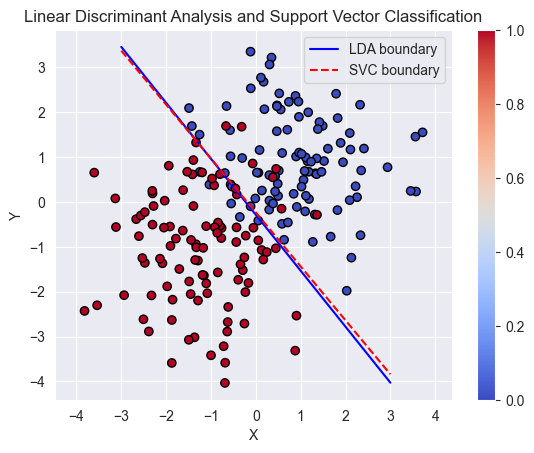

In [3]:
# Создаем данные
np.random.seed(0)
n_samples = 100
X0 = np.random.uniform(-1, 1, (n_samples, 2))
Z0 = np.random.normal(1, 1, (n_samples, 2))
Y0 = X0 + Z0
W0 = np.zeros(n_samples)

X1 = np.random.uniform(-1, 1, (n_samples, 2))
Z1 = np.random.normal(-1, 1, (n_samples, 2))
Y1 = X1 + Z1
W1 = np.ones(n_samples)

X = np.concatenate((X0, X1), axis=0)
Y = np.concatenate((Y0, Y1), axis=0)
W = np.concatenate((W0, W1), axis=0)

# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(Y, W)

# SVC
svc = SVC(kernel='linear')
svc.fit(Y, W)

# Рисуем данные и разделяющие прямые
plt.scatter(Y[:, 0], Y[:, 1], c=W, cmap='coolwarm', edgecolors='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Discriminant Analysis and Support Vector Classification')
plt.colorbar()
plt.axis('equal')

# Разделяющая прямая для LDA
coef = lda.coef_[0]
intercept = lda.intercept_[0]
x_line = np.linspace(-3, 3, 2)
y_line_lda = (-coef[0] / coef[1]) * x_line - (intercept / coef[1])
plt.plot(x_line, y_line_lda, label='LDA boundary', color='blue')

# Разделяющая прямая для SVC
coef = svc.coef_[0]
intercept = svc.intercept_[0]
y_line_svc = (-coef[0] / coef[1]) * x_line - (intercept / coef[1])
plt.plot(x_line, y_line_svc, label='SVC boundary', linestyle='dashed', color='red')

plt.legend()
plt.show()



# №3 C помощью make_multilabel_classification создайте набор данных с несколькими классами и испытайте на них классификацию SVM с гауссовским ядром.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


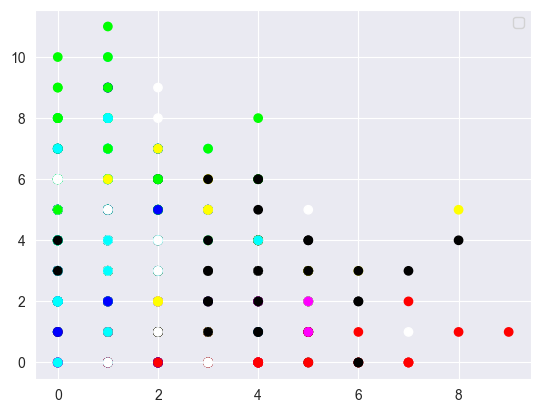

Точность модели (Accuracy): 0.91


In [7]:
from sklearn.datasets import make_multilabel_classification
from sklearn.svm import SVC, OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Генерация набора данных с несколькими классами
X, y = make_multilabel_classification(n_samples=1000, n_classes=3, n_labels=2, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.legend(loc='best')
plt.show()
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Преобразование многозначных индикаторов в метки классов для y_test
y_test_labels = np.argmax(y_test, axis=1)

# Обучение модели методом опорных векторов (SVM) с гауссовским ядром
model = SVC(kernel='rbf', gamma='scale')
model.fit(X_train, np.argmax(y_train, axis=1))

# Предсказание классов для тестовых данных
y_pred = model.predict(X_test)
# Оценка качества модели
accuracy = accuracy_score(y_test_labels, y_pred)
print(f'Точность модели (Accuracy): {accuracy}')
